# Time Series Analysis: U.S. State Government Expenditure (2012–2023)

In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

## Load the Excel File

In [3]:
df = pd.read_excel("../data/state_finance_data.xlsx")
df.head()

,State,Year,Total.Revenue,General.Revenue,Intergovernmental.Revenue,Total.Taxes,License.Taxes,Miscellaneous.General.Revenue,Insurance.Trust.Revenue,Total.Expenditure,...,General.Expenditure.Hospitals,General.Expenditure.Health,General.Expenditure.Highways,General.Expenditure.Police.Protection,General.Expenditure.Correction,General.Expenditure.Natural.Resources,General.Expenditure.Parks.And.Recreation,General.Expenditure.Governmental.Administration,General.Expenditure.Interest.General.Debt,General.Expenditure.Others.And.Unallocable
0,Alabama,2012.0,29652729.0,23527080.0,9575193.0,9049294.0,517676.0,1141032.0,5858261.0,30813117.0,...,1949355.0,498933.0,1468133.0,119458.0,544531.0,248089.0,27729.0,627872.0,340153.0,1500157.0
1,Alabama,2013.0,30469040.0,24248330.0,9850561.0,9270919.0,490430.0,1195567.0,5942462.0,31382719.0,...,2150887.0,455497.0,1578517.0,119097.0,524014.0,259423.0,21172.0,637511.0,352891.0,1482771.0
2,Alabama,2014.0,29321403.0,24136181.0,9378560.0,9296846.0,386378.0,1242898.0,4896240.0,31758035.0,...,2248960.0,421115.0,1562694.0,124635.0,541838.0,253936.0,22788.0,650581.0,451887.0,1482741.0
3,Alabama,2015.0,28169117.0,26154103.0,10034425.0,9755439.0,493883.0,1687595.0,1706834.0,32459306.0,...,2370549.0,414116.0,1631748.0,155814.0,555852.0,266925.0,22088.0,629174.0,364207.0,1295634.0
4,Alabama,2016.0,30732245.0,25848641.0,9525667.0,10355317.0,575510.0,1143026.0,4558211.0,31582710.0,...,2636578.0,412668.0,1653128.0,170514.0,541525.0,250813.0,18359.0,647950.0,355087.0,1186336.0


## Clean & Prepare the Data

In [4]:
df = df[['Year', 'Total.Expenditure']].dropna()
df['Year'] = df['Year'].astype(int)
yearly_expenditure = df.groupby('Year')['Total.Expenditure'].sum()
yearly_expenditure.head()

Year
2012    1.991289e+09
2013    2.023358e+09
2014    2.078644e+09
2015    2.161620e+09
2016    2.244467e+09
Name: Total.Expenditure, dtype: float64

## Plot the Expenditure Over Time

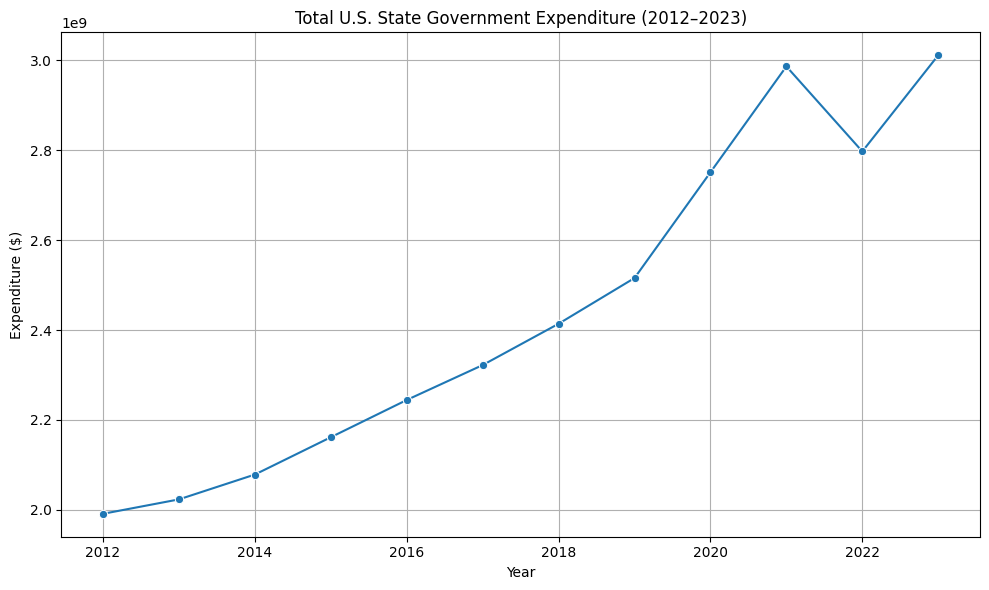

In [5]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_expenditure.index, y=yearly_expenditure.values, marker='o')
plt.title('Total U.S. State Government Expenditure (2012–2023)')
plt.xlabel('Year')
plt.ylabel('Expenditure ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Optional: Rolling Average

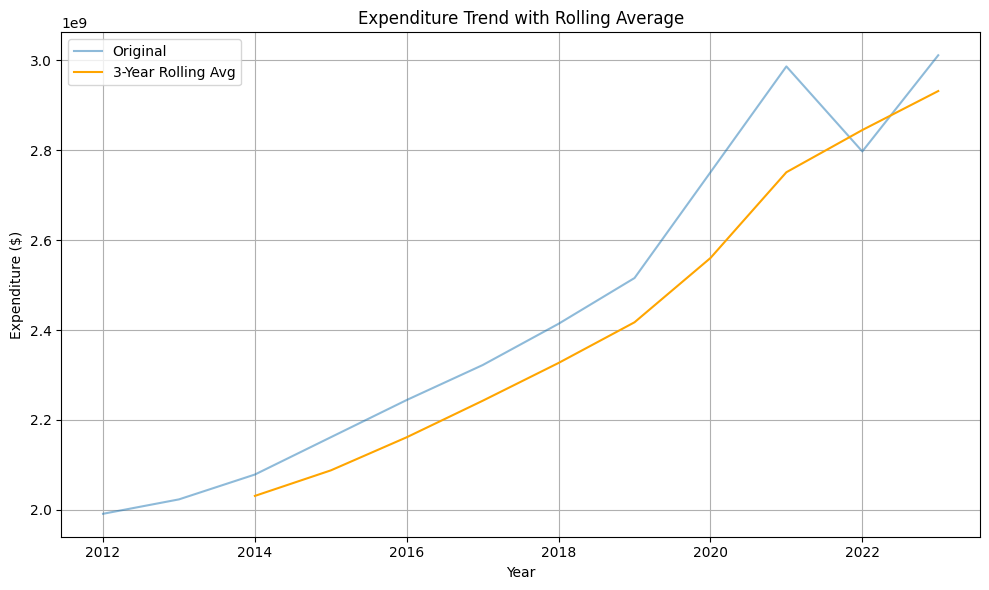

In [6]:
rolling_avg = yearly_expenditure.rolling(window=3).mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_expenditure.index, y=yearly_expenditure.values, label='Original', alpha=0.5)
sns.lineplot(x=rolling_avg.index, y=rolling_avg.values, label='3-Year Rolling Avg', color='orange')
plt.title('Expenditure Trend with Rolling Average')
plt.xlabel('Year')
plt.ylabel('Expenditure ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Forecast with ARIMA

In [7]:
model = ARIMA(yearly_expenditure, order=(1, 1, 1))
results = model.fit()
forecast = results.forecast(steps=5)
print("Forecast for the next 5 years:")
print(forecast)

# Get the last year from your historical data
last_year = yearly_expenditure.index.max()

# Generate correct year labels for the forecast
forecast_years = list(range(last_year + 1, last_year + 1 + len(forecast)))
forecast.index = forecast_years

Forecast for the next 5 years:
12    3.100486e+09
13    3.189482e+09
14    3.278351e+09
15    3.367094e+09
16    3.455711e+09
Name: predicted_mean, dtype: float64


/Users/anelnaukan/GitHub/time-series-analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/anelnaukan/GitHub/time-series-analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/anelnaukan/GitHub/time-series-analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/anelnaukan/GitHub/time-series-

## Plot the Forecast

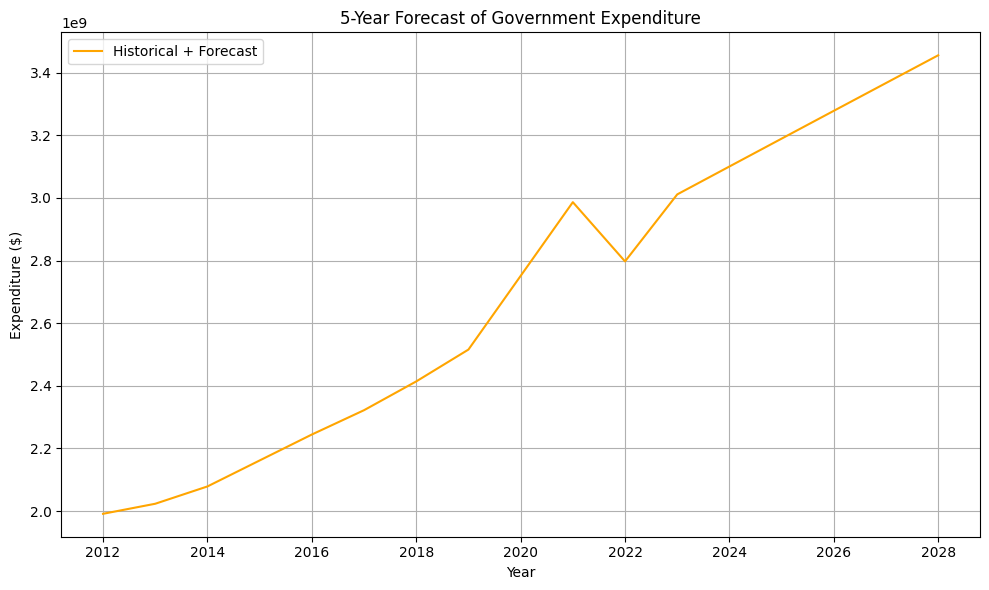

In [8]:
plt.figure(figsize=(10, 6))
combined = pd.concat([yearly_expenditure, forecast])
plt.plot(combined.index, combined.values, label='Historical + Forecast', color='orange')
plt.title('5-Year Forecast of Government Expenditure')
plt.xlabel('Year')
plt.ylabel('Expenditure ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()